# 🧠 01 — Image Basics with OpenCV and NumPy

> *"An image is not what you **see**. It's what the computer **reads**."*

---

## 🔍 What *is* an Image?

Before we dive into code, let’s understand what a digital image is:

* 📷 A **grayscale image** is a 2D array of pixel intensity values ranging from **0 to 255**.
* 🌈 A **color image (RGB)** is a 3D array with 3 channels: **Red**, **Green**, and **Blue**.

Let’s visualize this using OpenCV and Matplotlib.

---

## 📥 Download a Sample Image

We’ll use the classic **Lena image** to explore image structures.

In [12]:
# !wget https://raw.githubusercontent.com/opencv/opencv/master/samples/data/lena.jpg -O sample.jpg

--2025-07-26 11:43:46--  https://raw.githubusercontent.com/opencv/opencv/master/samples/data/lena.jpg
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.110.133, 185.199.111.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 91814 (90K) [image/jpeg]
Saving to: ‘sample.jpg’

sample.jpg          100%[===================>]  89.66K  --.-KB/s    in 0.01s   

2025-07-26 11:43:46 (6.56 MB/s) - ‘sample.jpg’ saved [91814/91814]



---

## 📦 Load and Display an RGB Image

Image shape: (512, 512, 3)


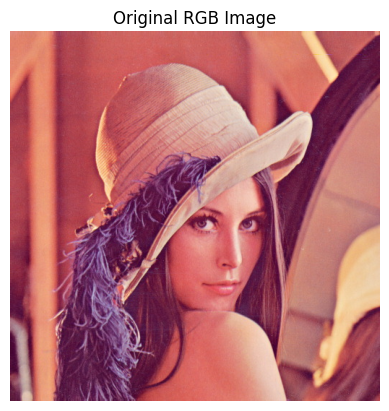

In [13]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load image (OpenCV loads in BGR format)
image = cv2.imread('sample.jpg')
print(f"Image shape: {image.shape}")

# Convert to RGB for correct display in matplotlib
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# Show image
plt.imshow(image_rgb)
plt.title("Original RGB Image")
plt.axis("off")
plt.show()

> 💡 **Note:** OpenCV reads images in **BGR**, not RGB. Convert using `cv2.cvtColor()` before visualization.

---

## 🌑 Convert to Grayscale

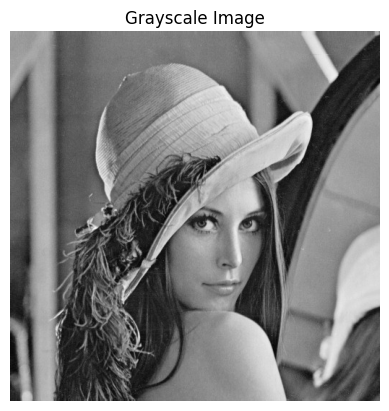

In [14]:
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

plt.imshow(gray, cmap='gray')
plt.title("Grayscale Image")
plt.axis("off")
plt.show()

---

## 📊 Pixel Intensity Distribution

Understanding histogram distributions helps analyze brightness, contrast, and exposure.

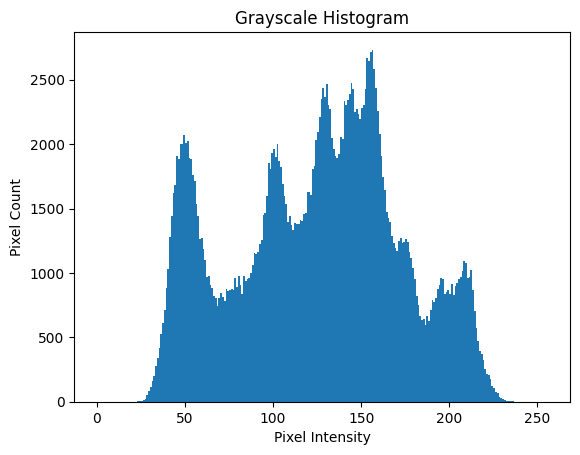

In [15]:
plt.hist(gray.ravel(), bins=256, range=(0, 256))
plt.title("Grayscale Histogram")
plt.xlabel("Pixel Intensity")
plt.ylabel("Pixel Count")
plt.show()

---

## 🧮 Access Pixel-Level Data

In [16]:
(h, w) = image.shape[:2]
center_pixel = image[h // 2, w // 2]  # BGR format
print(f"Center pixel (BGR): {center_pixel}")

# 10x10 patch around the center
patch = image[h//2-5:h//2+5, w//2-5:w//2+5]
print("10x10 pixel patch:\n", patch)


Center pixel (BGR): [ 74  65 181]
10x10 pixel patch:
 [[[175 192 213]
  [175 196 218]
  [176 197 228]
  [165 184 229]
  [137 152 215]
  [ 98 105 190]
  [ 86  86 186]
  [ 90  84 195]
  [102  93 210]
  [106  96 216]]

 [[168 190 215]
  [172 193 224]
  [160 179 224]
  [123 140 203]
  [ 81  92 174]
  [ 77  79 179]
  [ 92  89 199]
  [100  91 207]
  [104  92 210]
  [106  96 216]]

 [[173 192 229]
  [159 178 229]
  [115 128 196]
  [ 77  84 171]
  [ 77  79 181]
  [ 77  79 187]
  [ 91  87 200]
  [ 99  90 206]
  [100  89 205]
  [ 97  88 204]]

 [[147 166 217]
  [101 112 186]
  [ 73  75 169]
  [ 68  65 174]
  [ 81  75 192]
  [ 82  81 197]
  [ 80  77 193]
  [ 90  81 197]
  [ 92  81 197]
  [ 85  77 191]]

 [[ 82  97 160]
  [ 53  58 149]
  [ 70  64 175]
  [ 69  59 183]
  [ 73  62 189]
  [ 73  70 193]
  [ 77  73 192]
  [ 75  63 181]
  [ 70  57 173]
  [ 71  63 177]]

 [[ 53  49 154]
  [ 70  56 162]
  [ 79  60 169]
  [ 77  61 173]
  [ 77  62 177]
  [ 74  65 181]
  [ 72  64 178]
  [ 76  69 180]
  [ 78  

/tmp/ipykernel_4291/1996635554.py:39: RuntimeWarning: overflow encountered in scalar add
  axs[1].text(j, i, text, color='white' if r + g + b < 384 else 'black',


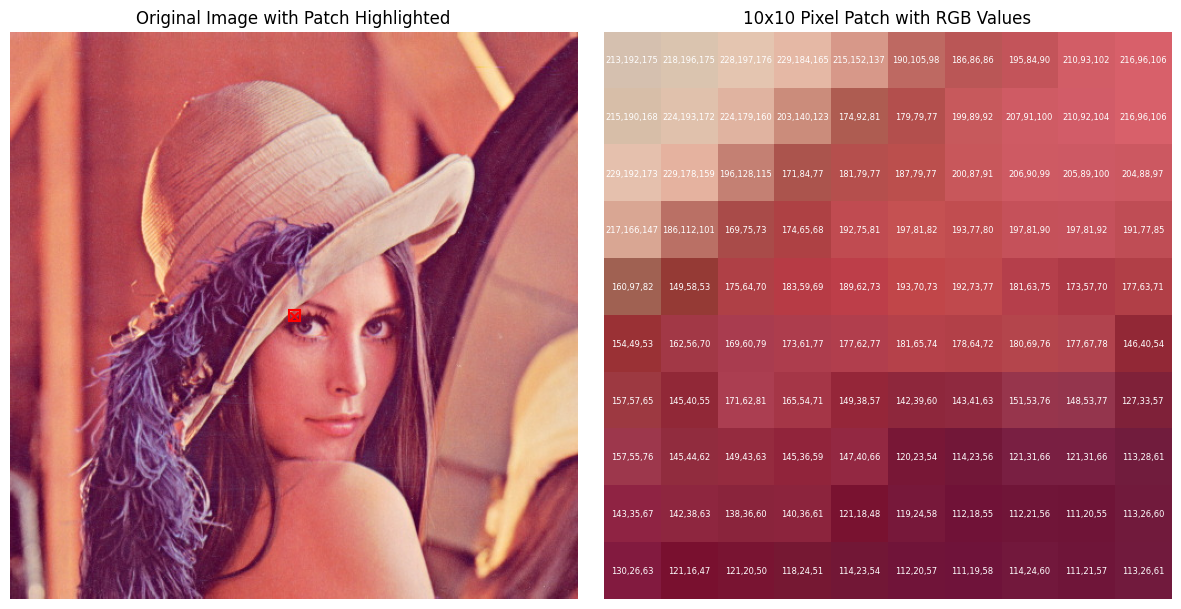

In [22]:
import cv2
import matplotlib.pyplot as plt

# Read image
image = cv2.imread('sample.jpg')  # Replace with your image path
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# Get image center
h, w = image.shape[:2]
cx, cy = w // 2, h // 2

# Patch parameters
patch_size = 10
half_patch = patch_size // 2

# Extract 10x10 patch around the center
patch = image_rgb[cy - half_patch:cy + half_patch, cx - half_patch:cx + half_patch]

# Visualization
fig, axs = plt.subplots(1, 2, figsize=(12, 6))

# 1. Original image with patch location
axs[0].imshow(image_rgb)
axs[0].scatter(cx, cy, color='red', marker='x')
axs[0].add_patch(plt.Rectangle((cx - half_patch, cy - half_patch), patch_size, patch_size,
                               edgecolor='red', facecolor='none', linewidth=1.5))
axs[0].set_title('Original Image with Patch Highlighted')
axs[0].axis('off')

# 2. Zoomed-in patch with RGB annotations
axs[1].imshow(patch, interpolation='nearest')
axs[1].set_title('10x10 Pixel Patch with RGB Values')

# Annotate each pixel
for i in range(patch_size):
    for j in range(patch_size):
        r, g, b = patch[i, j]
        text = f"{r},{g},{b}"
        axs[1].text(j, i, text, color='white' if r + g + b < 384 else 'black',
                    fontsize=6, ha='center', va='center')

axs[1].axis('off')
plt.tight_layout()
plt.show()


In [26]:
from plotly import express as px

In [27]:
px.imshow(patch)

---

## ✂️ Resize and Flip

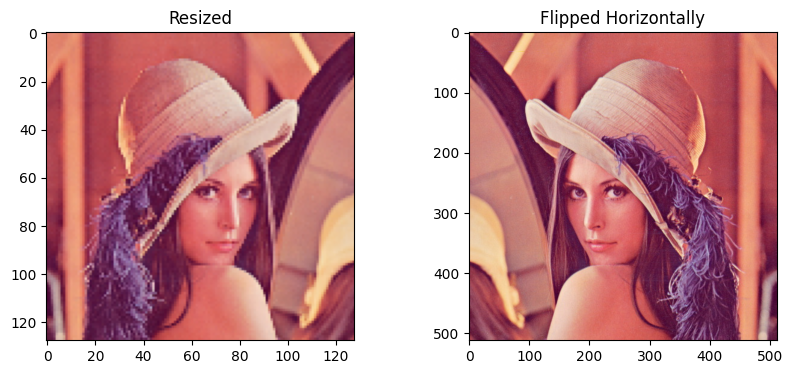

In [17]:
resized = cv2.resize(image_rgb, (128, 128))
flipped = cv2.flip(image_rgb, 1)

plt.figure(figsize=(10, 4))
plt.subplot(1, 2, 1); plt.imshow(resized); plt.title("Resized")
plt.subplot(1, 2, 2); plt.imshow(flipped); plt.title("Flipped Horizontally")
plt.show()

---

## 🔍 View Individual Color Channels

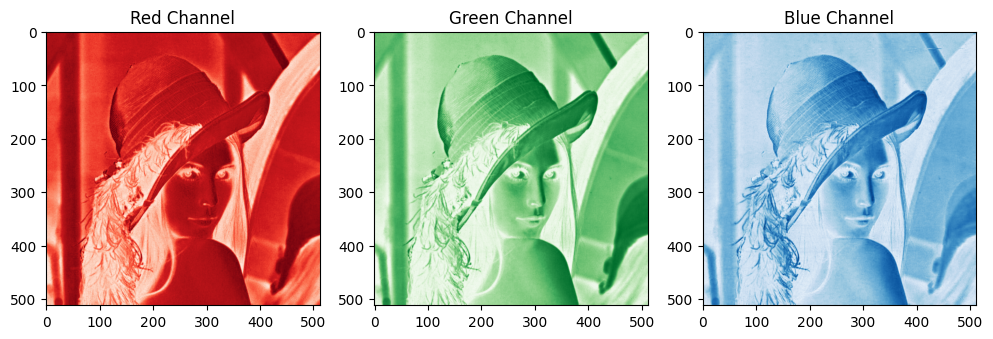

In [19]:
r, g, b = cv2.split(image_rgb)

plt.figure(figsize=(12, 4))
plt.subplot(1, 3, 1); plt.imshow(r, cmap='Reds'); plt.title("Red Channel")
plt.subplot(1, 3, 2); plt.imshow(g, cmap='Greens'); plt.title("Green Channel")
plt.subplot(1, 3, 3); plt.imshow(b, cmap='Blues'); plt.title("Blue Channel")
plt.show()

---

## 🧪 Mini Challenge: Remove the Red Channel

In [ ]:
image_no_red = image_rgb.copy()
image_no_red[:, :, 0] = 0  # Red channel (index 0 in RGB)

plt.imshow(image_no_red)
plt.title("Red Channel Removed")
plt.axis("off")
plt.show()


---

## ✅ Summary

* ✅ Images are arrays — grayscale is 2D, RGB is 3D.
* 🌀 OpenCV reads in **BGR**, not RGB.
* 🔬 You can extract channels, resize, flip, and inspect histograms.
* 🧬 NumPy gives full pixel-level control.

---

## 📚 Want to Learn More?

* 📘 [PyImageSearch – OpenCV Basics](https://pyimagesearch.com/category/opencv/)
* 📘 [CS231n – Digital Image Fundamentals](https://cs231n.github.io/)
* 📘 [OpenCV Documentation](https://docs.opencv.org/4.x/)

---

## 🧪 Coming Up Next

> In the next notebook, we’ll explore **color spaces** like HSV and LAB — and understand why they matter for real-world applications like segmentation and filtering.